<a href="https://colab.research.google.com/github/AliceInHunterland/colab/blob/main/comparison_of_audio_result_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import librosa
audio_data_source = '/content/drive/MyDrive/vocoder/bigrussian/source.wav'
x1 , sr1 = librosa.load(audio_data_source)
print(type(x1), type(sr1))
print(x1,sr1)

audio_data_pwg = '/content/drive/MyDrive/vocoder/bigrussian/source_gen.wav'
x , sr = librosa.load(audio_data_pwg)
print(type(x), type(sr))
print(x,sr)
print(len(x1))
print(len(x))

audio_data_melgan = '/content/drive/MyDrive/vocoder/bigrussian/result1.wav'
x2 , sr2 = librosa.load(audio_data_melgan)

print(x2,sr2)

print(len(x2))

<class 'numpy.ndarray'> <class 'int'>
[ 1.0948509e-07 -5.9357387e-07  6.1528431e-07 ... -2.5690412e-03
 -3.3825350e-03  0.0000000e+00] 22050
<class 'numpy.ndarray'> <class 'int'>
[-0.00894165 -0.00680542 -0.00653076 ...  0.00088501  0.00088501
  0.00064087] 22050
109054
109056
[0.00391342 0.00917145 0.01453485 ... 0.00062712 0.00024386 0.        ] 22050
109016


In [102]:
print('Source')
import IPython.display as ipd
ipd.Audio(audio_data_source)


Source


In [103]:
print('PWG')
ipd.Audio(audio_data_pwg)


PWG


In [104]:
print('MelGAN')
ipd.Audio(audio_data_melgan)

MelGAN


In [105]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [106]:
import sklearn

print(sklearn.__version__)

0.24.1


In [107]:
from sklearn.utils import check_array
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, max_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [108]:
#oshibka=mean_absolute_percentage_error(x1,x)
#acc=accuracy_score(x1,x[:-2])
mae=mean_absolute_error(x1,x[:-2])
max_er=max_error(x1,x[:-2])
mse=mean_squared_error(x1,x[:-2])
mape=mean_absolute_percentage_error(x1,x[:-2])

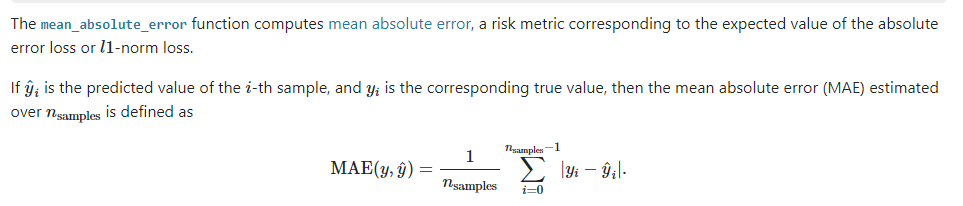

In [109]:
print('pwg mae ', mae)
print('melgan mae',mean_absolute_error(x1[:-38],x2))

pwg mae  0.049941
melgan mae 0.05892815


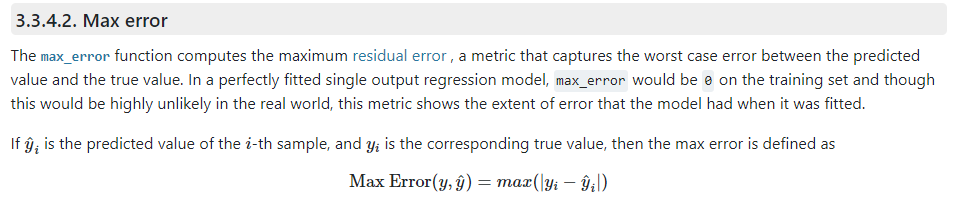

In [110]:
print('pwg max error',max_er)
print('melgan max error',max_error(x1[:-38],x2))

pwg max error 0.9172317
melgan max error 1.3680673


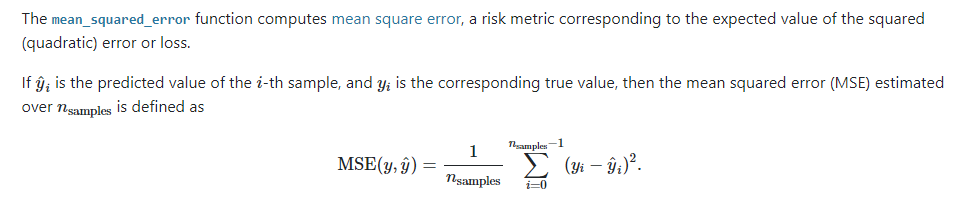

In [111]:
print('pwg mse',mse)
print('melgan mse',mean_squared_error(x1[:-38],x2))

pwg mse 0.0073443297
melgan mse 0.011113055


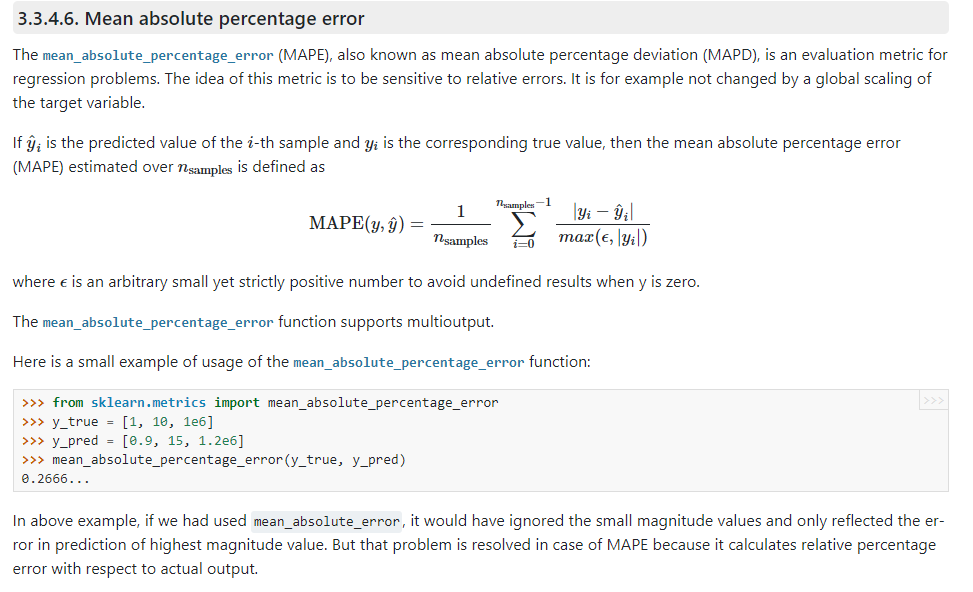

In [112]:
print('pwg mape',mape)
print('melgan mape',mean_absolute_percentage_error(x1[:-38],x2))

pwg mape 36548290.0
melgan mape 138.52464


# Summary:

For this visualization project, have created two classes to help identify spectral differences between audio files. The code below deomstrates how to produce these graphical comparisons using the `AudioAnalyzer` and `SpectrumCompare` classes.  

These classes can be found in the `python/AudioAnalyzer.py` file. All necessary imports can be found in that file. 

The audio files I use to demo these visualization processes can be found in `audio` subdirectory. These files are all different versions of the Beatles, _Yesterday_.  

* Original 1965
* Remaster 2009
* Remaster 2015  

For a detailed walkthrough and analysis, see [this medium article](https://medium.com/@qdizon/a-data-scientists-approach-to-visual-audio-comparison-fa15a5d3dcef)
***

# Table of Contents:

### 1. Imports
### 2. AudioAnalyzer Initialization
### 3. Individual Spectrum plotting
### 4. SpectrumCompare Initialization
### 5. Graph Types and Options for SpectrumCompare Instances
***

In [113]:
!git clone https://github.com/QED0711/audio_analyzer.git

Cloning into 'audio_analyzer'...
remote: Enumerating objects: 68, done.
^C


In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports:

In [115]:
cd audio_analyzer/

[Errno 2] No such file or directory: 'audio_analyzer/'
/content/audio_analyzer/audio_analyzer


In [116]:
%load_ext autoreload
%autoreload 1

from python.AudioAnalyzer import *
%aimport python.AudioAnalyzer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## AudioAnalyzer Initialization

To instantiate an AudioAnalyzer instance, the first argument must point to a valid audio file. 

> Note: Make sure you any necessary audio codec installed on your computer. Most computers can work with WAV files, but some may have trouble working with MP3 files if the correct codec is not installed.

You may optionally (though it is recommended) set the sample rate and fft bin size. See Docstring for default values.   

In [117]:
original = AudioAnalyzer("/content/drive/MyDrive/vocoder/bigrussian/source.wav", input_sr=44100, fft_size=44100)
remaster_09 = AudioAnalyzer("/content/drive/MyDrive/vocoder/bigrussian/source_gen.wav", input_sr=44100, fft_size=44100)
remaster_15 = AudioAnalyzer("/content/drive/MyDrive/vocoder/bigrussian/result1.wav", input_sr=44100, fft_size=44100)

## Individual Spectrum plotting

For each initialized AudioAnalyzer instance, we can plot a basic spectrogram using the `.plot_spectrogram`. This specrogram averages amplitudes overall frequency bins for the entire duration of he excerpt/song. 

you can optionally set a window size to define your minimum and maximum plotted frequencies. This is done with the `min_freq` and `max_freq` respectively. 

Other arguments can be passed in to define the labels of the resulting graph. See docstring for details.  

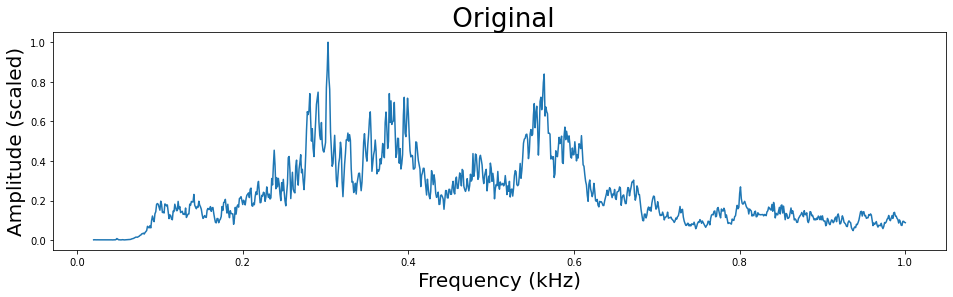

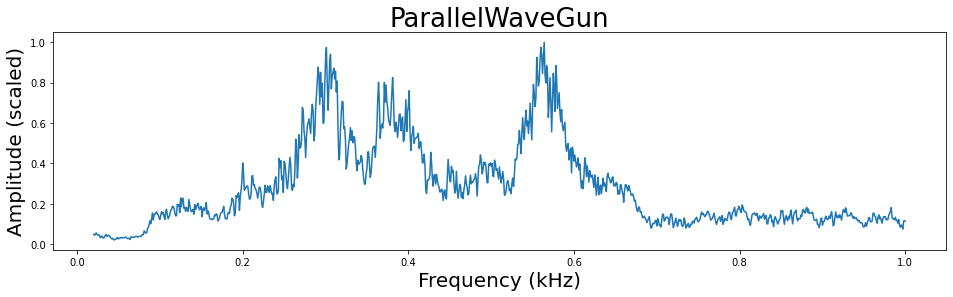

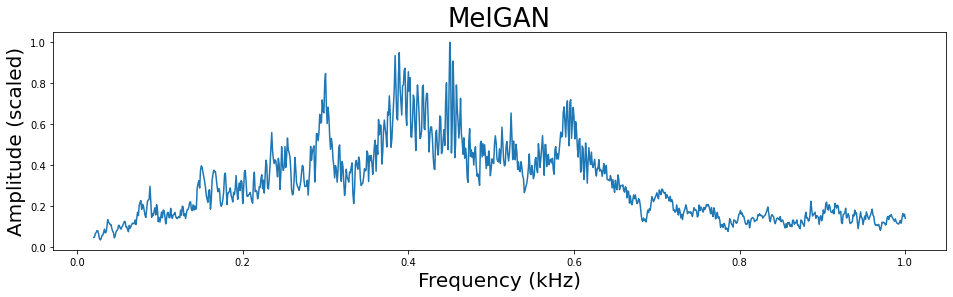

In [118]:
original.plot_spectrum(min_freq=20, max_freq=1000, title=" Original")
remaster_09.plot_spectrum(min_freq=20, max_freq=1000, title="ParallelWaveGun")
remaster_15.plot_spectrum(min_freq=20, max_freq=1000, title="MelGAN")

## SpectrumCompare Initialization

To instantiate a `SPectrumCompare` instance, simply pass in two of the previously defined `AudioAnalyzer` instances. 

> Note: The order in which you pass your `AudioAnalyzer` instances in will determine certain graphing features later on (explained more below).

In [119]:
orig_to_09 = SpectrumCompare(original, remaster_09)
orig_to_15 = SpectrumCompare(original, remaster_15)
remasters = SpectrumCompare(remaster_09, remaster_15)

## Graph Types and Options for SpectrumCompare Instances

The below code portions show whats kinds of visualizations are currently available, and how to plot them. Docstrings are avilable that explain many of the options, but I will detail some of the main ones here.

### Options for Graph Types:

#### plot_spectrum_group

Useful for comparing the relative amplitudes at varying frequency bins for the two excerpts. Note that the y-axis has been scaled from 0 to 1 so the amplitudes can be compared on the same scale. 

4 lines are plotted:

* Blue - Spectrogram of first `AudioAnalyzer` input
* Orange - Spectrogram of second `AudioAnalyzer` input
* Green - The difference in amplitudes between the two excerpts
* Red - The threshold line. When the green line appears below the red line, the first `AudioAalyzer` input has more amplitude at that instance. When the green line is above the red line, then the second `AudioAnalyzer` input has more amplitude at that moment.

#### plot_spectrum_heatmap

This heatmap is a generalized version of the plot_spectrum_group. It converts the amplitude difference to a heatmap, and displays one of the spectrograms as an overlay on that heatmap. "Hotter" spots indicate a larger difference in favor of the second `AudioAnalyzer` input. "Colder" spots indicate a larger difference in favor of the first `AudioAnalyzer` input.

you can choose which spectrogram to display with the `plot_spec1` argument. Setting this to `True` will plot the first `AudioAnalyzer` spectrogram. Setting it to `False` will plot the second. 

#### plot_amplitude_distributions

These graphs show the mean sampling distributions of amplitudes for both `AudioAnalyzer` instances. There is no frequency information in these graphs. Rather, they show if one excerpt is generally louder than the other. 

Additionally, a t test is run, and the t statistic and p values are returned to show if the mean amplitudes of the excerpts are statistically different. 

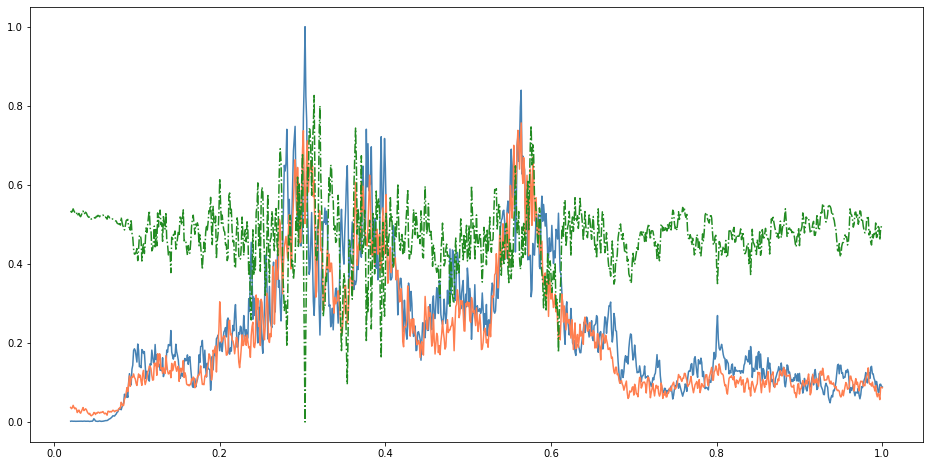

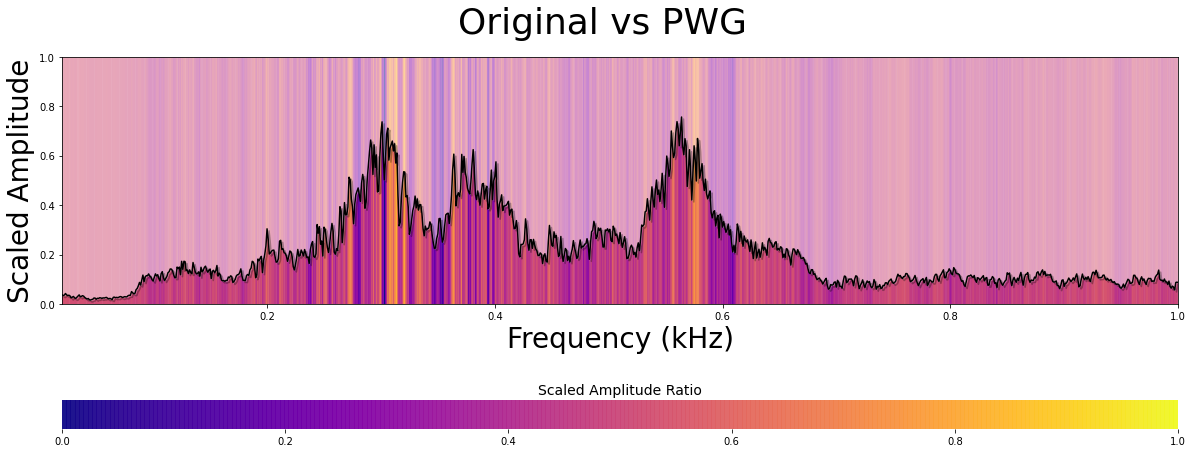

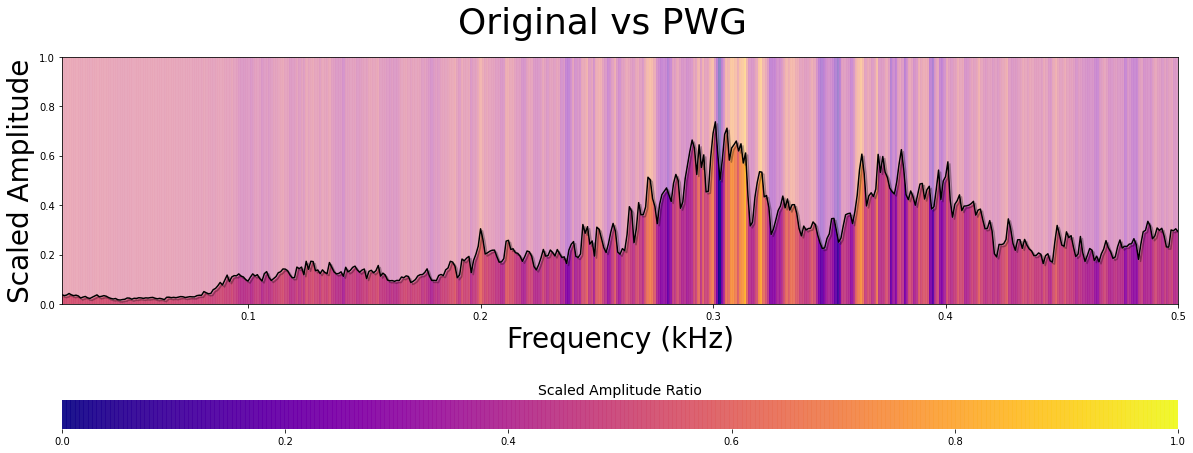

In [120]:

my1=orig_to_09.plot_spectrum_group(frange=(20,1000), 
    ratio=True, 
    threshold=True,
    title="Spectrograms - original vs PWG (with threshold)", 
    legend=("Original", "PWG", "Amplitude Diff.", "Threshold")
    )

orig_to_09.plot_spectrum_heatmap(
    frange=(20,1000), 
    plot_spec1=False,
    title="Original vs PWG"
)

orig_to_09.plot_spectrum_heatmap(
    frange=(20,500), 
    plot_spec1=False, 
    title="Original vs PWG"
)


20      0.534053
21      0.530514
22      0.533126
23      0.539172
24      0.533828
          ...   
996     0.492189
997     0.460147
998     0.488909
999     0.495482
1000    0.495672
Name: scaled_amplitude, Length: 981, dtype: float64


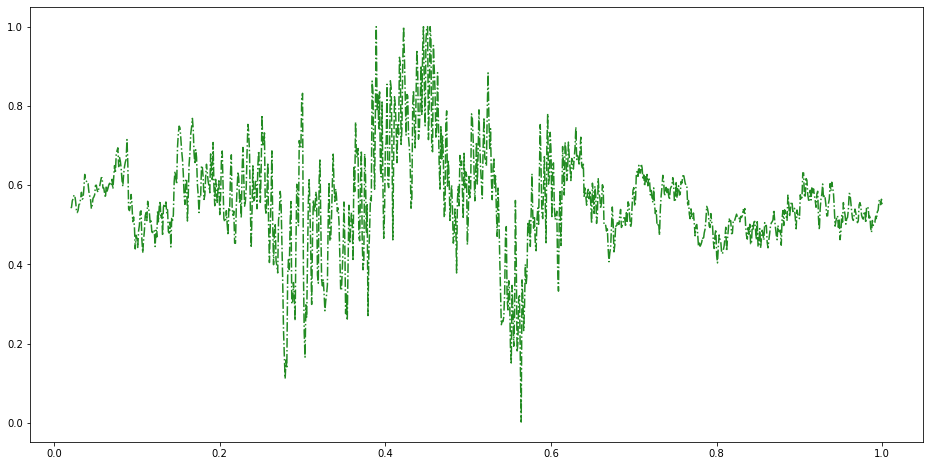

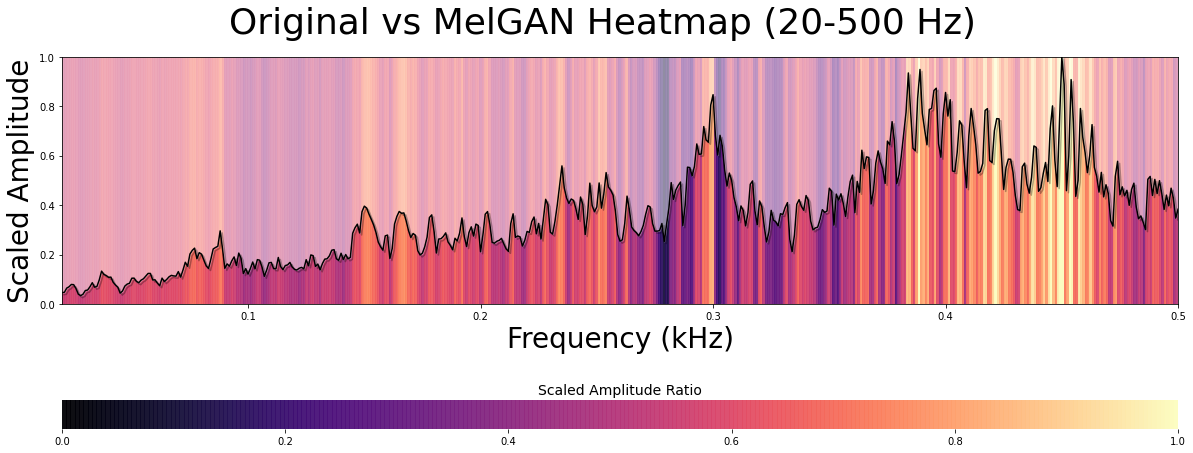

In [132]:

my2= orig_to_15.plot_spectrum_group(frange=(20,1000), 
                               spec_1=False,
                            spec_2=False,
    ratio=True, 
    threshold=True,
    title="Original vs MelGAN",
    legend=("Original", "MelGAN", "Amplitude Diff.", "Threshold")
    )

orig_to_15.plot_spectrum_heatmap(frange=(20,500), 
    plot_spec1=False, 
    cmap='magma',
    title="Original vs MelGAN Heatmap (20-500 Hz)"
    )

print(my1[1])

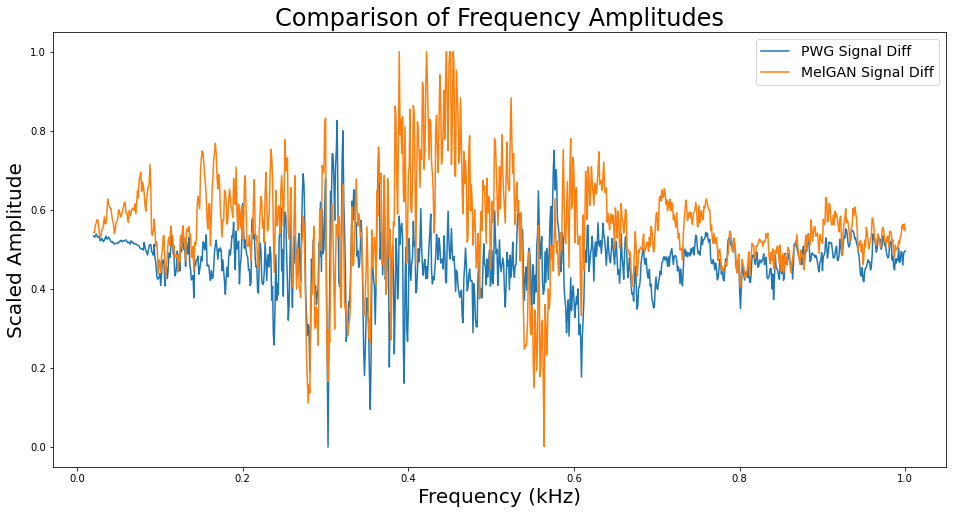

In [134]:
#print(my1[0])
import matplotlib.pyplot as plt
title="Comparison of Frequency Amplitudes"
xlabel="Frequency (kHz)"
ylabel="Scaled Amplitude"
legend=["PWG Signal Diff", "MelGAN Signal Diff"]
fig = plt.figure(figsize=(16,8))

plt.plot(my1[0],my1[1],label=legend[0])
plt.plot(my2[0],my2[1],label=legend[1])
plt.title(title, fontsize=24)
plt.xlabel(xlabel, fontsize=20)
plt.ylabel(ylabel, fontsize=20)

plt.legend(fontsize=14) 

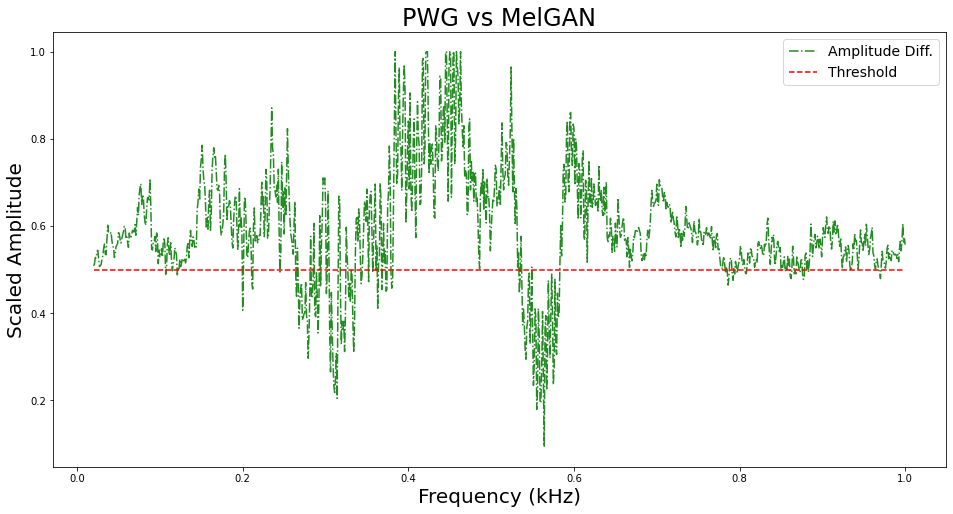

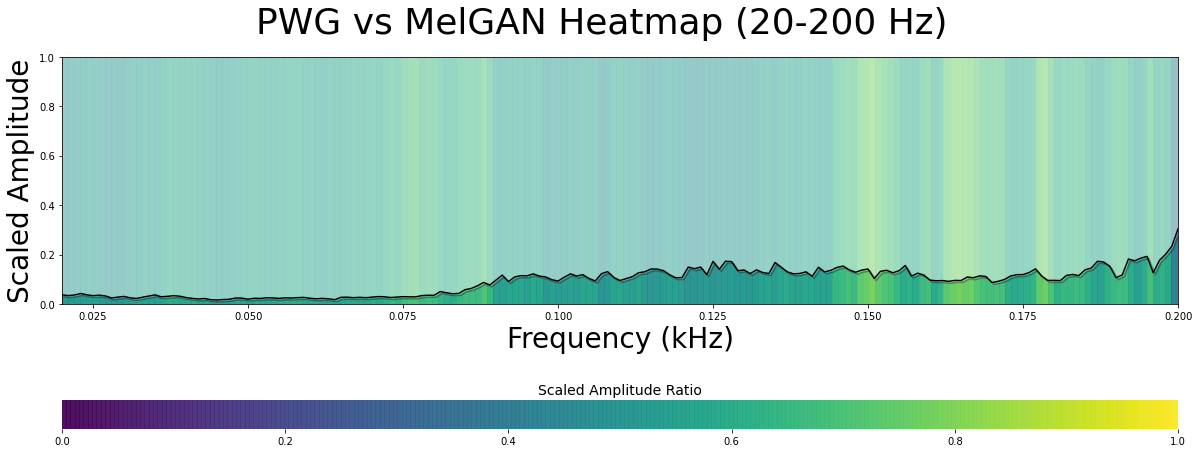

In [62]:
remasters.plot_spectrum_group(
    frange=(20,1000),  spec_1=False,
                            spec_2=False,
    ratio=True, 
    threshold=True,
    title="PWG vs MelGAN",
    legend=("PWG", "MelGAN", "Amplitude Diff.", "Threshold")
    )

remasters.plot_spectrum_heatmap(
    frange=(20,200), 
    plot_spec1=True, 
    cmap='viridis',
    title="PWG vs MelGAN Heatmap (20-200 Hz)"
    )

In [ ]:
orig_to_09.plot_amplitude_distributions(title="Original vs PWG")

In [ ]:
orig_to_15.plot_amplitude_distributions(title="Original vs MelGAN")

In [ ]:
remasters.plot_amplitude_distributions(title="PWG vs MelGAN")

## Additional Demonstration:

The code below shows what happens when we compare an excerpt to itself. As expected, the amplitudes are not statistically different, and the heatmap plot has no color variation. 

In [ ]:
equal = SpectrumCompare(remaster_15, remaster_15)

equal.plot_amplitude_distributions()
equal.plot_spectrum_heatmap(frange=(20,1000))